In [81]:
database = ExperimentDatabase("./data/local/trpo-1Dbimod")
exps = database._experiments
for exp in exps:
    print exp.params['exp_name']
    
#chose the one you want to print its policy progress later:
path_experiment=os.path.join(datadir,exps[-1].params['exp_name'])
print path_experiment

trpo_1Dbimod_2016_04_10_14_54_50_0001
trpo_1Dbimod_2016_04_10_21_08_22_0001
trpo_1Dbimod_2016_04_10_21_52_25_0001
trpo_1Dbimod_2016_04_10_22_22_38_0001
trpo_1Dbimod_2016_04_10_23_17_39_0001
./data/local/trpo-1Dbimod/trpo_1Dbimod_2016_04_10_23_17_39_0001


In [115]:
print vars(exp).keys()
print exp.flat_params
print exp.progress.keys()
print np.size(exp.progress['Iteration'])

['progress', 'params', 'flat_params']
{u'params_log_file': u'params.json', u'n_parallel': 1, u'snapshot_mode': u'all', u'json_args_policy_env_spec': {u'obj': {u'_name': u'examples.bimod_env.BimodEnv'}, u'attr': u'spec'}, u'json_args_baseline_env_spec': {u'obj': {u'_name': u'examples.bimod_env.BimodEnv'}, u'attr': u'spec'}, u'seed': 1, u'json_args_policy_hidden_sizes': [8, 8], u'json_args_algo_discount': 0.99, u'plot': False, u'json_args_algo_max_path_length': 100, u'exp_name': 'trpo_1Dbimod_2016_04_10_23_17_39_0001', u'tabular_log_file': u'progress.csv', u'json_args_algo_whole_paths': True, u'log_dir': u'/Users/carlos/Library/rllab/data/local/trpo-1Dbimod/trpo_1Dbimod_2016_04_10_23_17_39_0001', u'json_args_policy': u'rllab.policies.gaussian_mlp_policy.GaussianMLPPolicy', u'json_args_algo': u'rllab.algos.trpo.TRPO', u'json_args_env': u'examples.bimod_env.BimodEnv', u'text_log_file': u'debug.log', u'args_data': u'Y2NvcHlfcmVnCl9yZWNvbnN0cnVjdG9yCnAxCihjcmxsYWIubWlzYy5pbnN0cnVtZW50ClN0dWJ

In [116]:
# print data_bimodal_1d.keys()
data_bimodal_1d = joblib.load(os.path.join(path_experiment,'itr_99.pkl'))
paths = data_bimodal_1d['paths']
print paths[-1]
env = data_bimodal_1d['env']
reward(0.2)

data_bimodal_1d.keys()


{'rewards': array([ 1.48961981]), 'agent_infos': {'log_std': array([[-4.0662733]]), 'mean': array([[ 1.00035776]])}, 'actions': array([[ 0.99285044]]), 'returns': array([ 1.48961981]), 'advantages': array([ 0.03056088]), 'observations': array([[ 0.]]), 'env_infos': {}}


['policy', 'paths', 'itr', 'baseline', 'env']

## One-step MDP, 0-restart
We will use this bandit-like problem in which we have only one shot at every iteration. Obviously the policy is a Gaussian so it will have to put all its weight in one of the two higher reward options (now -0.1 or 0.1).

In [52]:
from rllab.misc.nb_utils import ExperimentDatabase
import matplotlib.pyplot as plt
%matplotlib inline
import os
import joblib
import numpy as np
from glob import glob
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import lasagne


In [54]:
database = ExperimentDatabase("./data/local/trpo-1Dbimod")
print database._experiments


[<rllab.misc.nb_utils.Experiment object at 0x11277e510>, <rllab.misc.nb_utils.Experiment object at 0x113253690>, <rllab.misc.nb_utils.Experiment object at 0x115527c50>]


In [59]:
exps = database._experiments
for exp in exps:
    print exp.params['exp_name']
    
#chose the one you want to print its policy progress later:
path_experiment=os.path.join(datadir,exps[2].params['exp_name'])
print path_experiment


trpo_1Dbimod_2016_04_10_14_54_50_0001
trpo_1Dbimod_2016_04_10_21_08_22_0001
trpo_1Dbimod_2016_04_10_21_52_25_0001
./data/local/trpo-1Dbimod/trpo_1Dbimod_2016_04_10_21_52_25_0001


IOError: [Errno 2] No such file or directory: './hello/saving_trash.png'

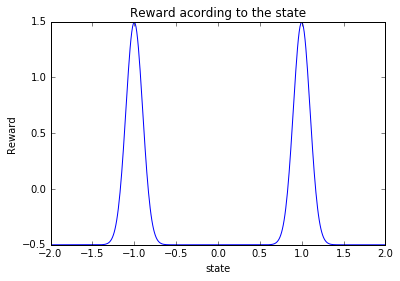

In [92]:
#How the reward function looks like
d = 1
# def reward(x): return 1./(2.*np.sqrt(2.*np.pi*0.1))*(np.exp(-0.5/0.1*(x-d)**2)+np.exp(-0.5/0.1*(x+d)**2)) - 0.5
sigma1=0.01
sigma2=0.01
mu1=-1
mu2=1
def reward(x): return - 0.5 + 1./(2.*np.sqrt(2.*np.pi*sigma1))*(np.exp(-0.5/sigma1*(x-mu1)**2)) \
                        + 1./(2.*np.sqrt(2.*np.pi*sigma2))*(np.exp(-0.5/sigma2*(x-mu2)**2))
x = np.arange(-2, 2, 0.01)
plt.plot(x,reward(x))
plt.title('Reward acording to the state')
plt.xlabel('state')
plt.ylabel('Reward')


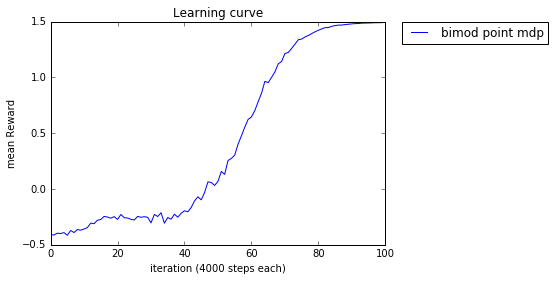

In [83]:
#Plot learning curve
for exp in exps:
    if 'trpo_1Dbimod_2016_04_10_21_52_25_0001' in exp.params['exp_name']:
#         dvg = exp.params['algo']['dvg']
#         lab = "dvg = {}".format(dvg) if dvg else "Baseline"
        lab = "bimod point mdp"
        plt.plot(exp.progress['AverageDiscountedReturn'], label = lab )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Learning curve')
plt.xlabel('iteration (4000 steps each)')
plt.ylabel('mean Reward')

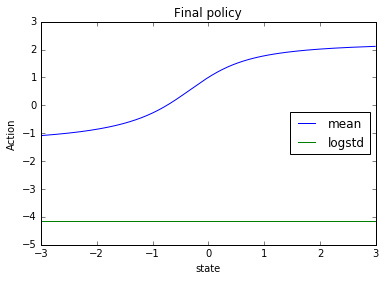

In [84]:
#final policy learned

# print os.path.join(path_experiment,'itr_99.pkl')
data_bimodal_1d = joblib.load(os.path.join(path_experiment,'itr_99.pkl'))
poli = data_bimodal_1d['policy']

poli.get_action(np.array((3,)))
x = np.arange(-3,3,0.01)
means = np.zeros(np.size(x))
logstd = np.zeros(np.size(x))
for i,s in enumerate(x):
    means[i] = poli.get_action(np.array((s,)))[1]['mean']
    logstd[i] = poli.get_action(np.array((s,)))[1]['log_std']
plt.plot(x, means, label = 'mean')
plt.plot(x, logstd, label = 'logstd')
plt.legend(loc = 5)
plt.title('Final policy')
plt.xlabel('state')
plt.ylabel('Action')

In [85]:
mean_at_0 = []
var_at_0 = []
print path_experiment
for itr in range(100):
    data_bimodal_1d = joblib.load(os.path.join(path_experiment,'itr_{}.pkl'.format(itr)))
    poli = data_bimodal_1d['policy']
    action_at_0 = poli.get_action(np.array((0,)))
    mean_at_0.append(action_at_0[1]['mean'])
    var_at_0.append(action_at_0[1]['log_std'])
    print "sampled action in iter {}: {}. Reward should be: {}".format(itr, action_at_0[0], reward(action_at_0[0]))

./data/local/trpo-1Dbimod/trpo_1Dbimod_2016_04_10_23_17_39_0001
sampled action in iter 0: [-1.05923875]. Reward should be: [ 0.11981185]
sampled action in iter 1: [ 1.96157583]. Reward should be: [-0.49380451]
sampled action in iter 2: [-0.21466392]. Reward should be: [-0.47072406]
sampled action in iter 3: [ 0.09165927]. Reward should be: [-0.48817892]
sampled action in iter 4: [-1.09612787]. Reward should be: [ 0.10230218]
sampled action in iter 5: [-0.17215895]. Reward should be: [-0.47884617]
sampled action in iter 6: [ 0.4701007]. Reward should be: [-0.34505375]
sampled action in iter 7: [-0.2192019]. Reward should be: [-0.46970049]
sampled action in iter 8: [-0.82628719]. Reward should be: [ 0.04244217]
sampled action in iter 9: [ 0.16693202]. Reward should be: [-0.47967563]
sampled action in iter 10: [-0.20287023]. Reward should be: [-0.47323677]
sampled action in iter 11: [-2.00040708]. Reward should be: [-0.49576709]
sampled action in iter 12: [-0.71961673]. Reward should be: 

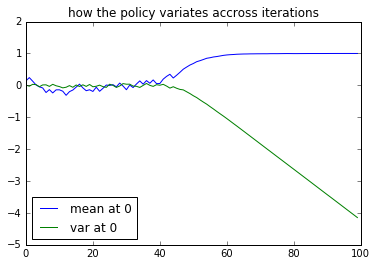

In [86]:
itr = range(100)
plt.plot(itr,mean_at_0, label = 'mean at 0')
plt.plot(itr,var_at_0, label = 'var at 0')
plt.title('how the policy variates accross iterations')
plt.legend(loc=3)

## Let's do the same but with narrower variance 0.01

In [117]:
datadir="./data/local/trpo-2Dbimod"
database = ExperimentDatabase(datadir,names_or_patterns='trpo_2Dbimod_2016_04_12_09_37_40_0001')
exps = database._experiments
colors=[(1,0.1,0.1),(0.1,1,0.1),(0.1,0.1,1),(1,1,0)]

for i, exp in enumerate(exps):
    #get the last pickle
    exp_name=exp.params['exp_name']
    path_experiment=os.path.join(datadir,exp_name)
    last_iter = np.size(exp.progress['Iteration']) - 1
    pkl_name= 'itr_{}'.format(last_iter)
    last_data_unpickle = joblib.load(os.path.join(path_experiment,pkl_name+'.pkl'))
    first_data_unpickle = joblib.load(os.path.join(path_experiment,'itr_0.pkl'))
    
    

In [155]:
print pkl_name
poli = last_data_unpickle['policy']
# print vars(poli)
poli.get_action(np.array((0,0)))
# print vars(exp).keys()
# print exp.flat_params
# print exp.progress.keys()
# print np.size(exp.progress['Iteration'])




itr_99


(array([ 0.86993201, -0.0142708 ]),
 {'log_std': array([-3.00146145, -3.80500662]),
  'mean': array([  9.99432057e-01,   5.58688825e-04])})

In [138]:
env = first_data_unpickle['env']
X = np.arange(-2, 2, 1)
Y = np.arange(-2, 2, 1)
X, Y = np.meshgrid(X, Y)
X_flat = X.reshape((-1,1))
Y_flat = Y.reshape((-1,1))
XY = np.concatenate((X_flat,Y_flat),axis=1)
rew=np.array([env.reward_state(xy) for xy in XY]).reshape((-1,1))
print rew

[[-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [ 0.29577472]
 [-0.5       ]
 [ 0.29577472]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]]


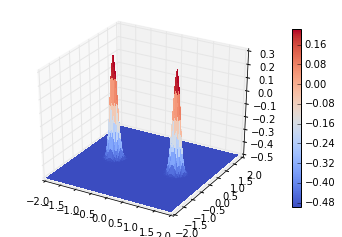

In [146]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)

X_flat = X.reshape((-1,1))
Y_flat = Y.reshape((-1,1))
XY = np.concatenate((X_flat,Y_flat),axis=1)
rew=np.array([env.reward_state(xy) for xy in XY]).reshape(np.shape(X))

surf = ax.plot_surface(X, Y, rew, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 1.01)

# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.8)

plt.show()

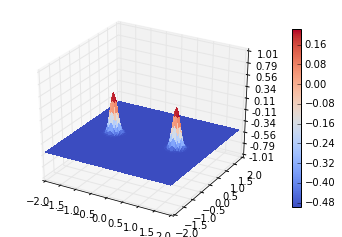

In [145]:

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)

X_flat = X.reshape((-1,1))
Y_flat = Y.reshape((-1,1))
XY = np.concatenate((X_flat,Y_flat),axis=1)
rew=np.array([env.reward_state(xy) for xy in XY]).reshape(np.shape(X))

surf = ax.plot_surface(X, Y, rew, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.8)

plt.show()